In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
%matplotlib inline

In [2]:
_im = cv2.imread('/Users/jedi/Downloads/8/7.png')

In [75]:
%time
g_im = cv2.cvtColor(_im, cv2.COLOR_BGR2GRAY)
b_im = cv2.GaussianBlur(_im, (13, 13), 0)

CPU times: user 5 µs, sys: 5 µs, total: 10 µs
Wall time: 14.1 µs


TypeError: src is not a numpy array, neither a scalar

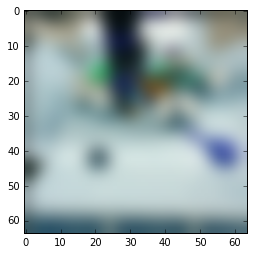

In [21]:
plt.imshow(b_im, cmap='gray')

In [73]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
class Laplacian(nn.Module):
    def __init__(self):
        super(Laplacian, self).__init__()

    def gauss_kernel(self, size=5, sigma=1.0):
        grid = np.float32(np.mgrid[0:size,0:size].T)
        gaussian = lambda x: np.exp((x - size//2)**2/(-2*sigma**2))**2
        kernel = np.sum(gaussian(grid), axis=2)
        kernel /= np.sum(kernel)
        return kernel

    def conv_gauss(self, t_input, stride=1, k_size=5, sigma=1.6, repeats=1):
        kernel = Variable(torch.from_numpy(self.gauss_kernel(k_size, sigma)).unsqueeze(0).unsqueeze(0)).float()
        pyr = Variable(torch.FloatTensor(t_input.size()))
        for i in range(3):
            pyr[:, i,:,:] = F.conv2d(t_input[:, i,:,:].unsqueeze(1), kernel, padding=2).squeeze(1)
        return pyr

    def make_laplacian_pyramid(self, x, max_levels):
        t_pyr = []
        current = x
        torchvision.utils.save_image(current.data, 'current.png')
        return
        for level in range(max_levels):
            t_gauss = self.conv_gauss(current, stride=1, k_size=5, sigma=2.0)
            t_diff = current - t_gauss
            t_pyr.append(t_diff)
            current = F.avg_pool2d(t_gauss, 2, 2)
        t_pyr.append(current)
        return t_pyr

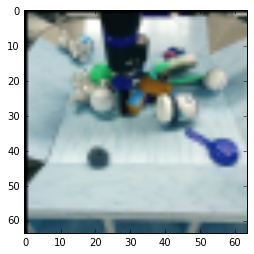

In [82]:
plt.imshow(_im)

In [83]:
_im

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [108, 119, 113],
        [ 89, 104,  97],
        ..., 
        [189, 190, 174],
        [186, 188, 172],
        [183, 185, 169]],

       [[  0,   0,   0],
        [142, 146, 136],
        [150, 152, 141],
        ..., 
        [ 42,  54,  51],
        [ 19,  41,  41],
        [ 18,  41,  40]],

       ..., 
       [[  0,   0,   0],
        [ 80, 108, 115],
        [ 27,  77,  98],
        ..., 
        [ 63,  94, 108],
        [ 65,  97, 112],
        [ 55,  89, 103]],

       [[  0,   0,   0],
        [114, 130, 127],
        [ 60,  98, 109],
        ..., 
        [ 57,  91, 106],
        [ 56,  94, 110],
        [ 51,  88, 105]],

       [[  0,   0,   0],
        [ 90, 113, 117],
        [ 89, 115, 121],
        ..., 
        [ 54,  89, 106],
        [ 53,  91, 108],
        [ 49,  87,

In [79]:
%time
py_img = Variable(torch.from_numpy(_im).float().unsqueeze(0).permute(0,3,1,2))
pyr = Laplacian().make_laplacian_pyramid(py_img, 2)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


In [80]:
py_img

Variable containing:
(0 ,0 ,.,.) = 
    0    0    0  ...     0    0    0
    0  108   89  ...   189  186  183
    0  142  150  ...    42   19   18
      ...         ⋱        ...      
    0   80   27  ...    63   65   55
    0  114   60  ...    57   56   51
    0   90   89  ...    54   53   49

(0 ,1 ,.,.) = 
    0    0    0  ...     0    0    0
    0  119  104  ...   190  188  185
    0  146  152  ...    54   41   41
      ...         ⋱        ...      
    0  108   77  ...    94   97   89
    0  130   98  ...    91   94   88
    0  113  115  ...    89   91   87

(0 ,2 ,.,.) = 
    0    0    0  ...     0    0    0
    0  113   97  ...   174  172  169
    0  136  141  ...    51   41   40
      ...         ⋱        ...      
    0  115   98  ...   108  112  103
    0  127  109  ...   106  110  105
    0  117  121  ...   106  108  106
[torch.FloatTensor of size 1x3x64x64]

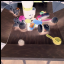

In [69]:
__im = torchvision.transforms.ToPILImage()
__im(py_img.data.squeeze(0))

In [81]:
a= py_img.squeeze(0).permute(1,2,0).data.numpy()
a

array([[[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        ..., 
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [ 108.,  119.,  113.],
        [  89.,  104.,   97.],
        ..., 
        [ 189.,  190.,  174.],
        [ 186.,  188.,  172.],
        [ 183.,  185.,  169.]],

       [[   0.,    0.,    0.],
        [ 142.,  146.,  136.],
        [ 150.,  152.,  141.],
        ..., 
        [  42.,   54.,   51.],
        [  19.,   41.,   41.],
        [  18.,   41.,   40.]],

       ..., 
       [[   0.,    0.,    0.],
        [  80.,  108.,  115.],
        [  27.,   77.,   98.],
        ..., 
        [  63.,   94.,  108.],
        [  65.,   97.,  112.],
        [  55.,   89.,  103.]],

       [[   0.,    0.,    0.],
        [ 114.,  130.,  127.],
        [  60.,   98.,  109.],
        ..., 
        [  57.,   91.,  106.],
        [  56.,   94.,  110.],
        [ 

In [61]:
_im

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [108, 119, 113],
        [ 89, 104,  97],
        ..., 
        [189, 190, 174],
        [186, 188, 172],
        [183, 185, 169]],

       [[  0,   0,   0],
        [142, 146, 136],
        [150, 152, 141],
        ..., 
        [ 42,  54,  51],
        [ 19,  41,  41],
        [ 18,  41,  40]],

       ..., 
       [[  0,   0,   0],
        [ 80, 108, 115],
        [ 27,  77,  98],
        ..., 
        [ 63,  94, 108],
        [ 65,  97, 112],
        [ 55,  89, 103]],

       [[  0,   0,   0],
        [114, 130, 127],
        [ 60,  98, 109],
        ..., 
        [ 57,  91, 106],
        [ 56,  94, 110],
        [ 51,  88, 105]],

       [[  0,   0,   0],
        [ 90, 113, 117],
        [ 89, 115, 121],
        ..., 
        [ 54,  89, 106],
        [ 53,  91, 108],
        [ 49,  87,

In [62]:
py_img

Variable containing:
(0 ,0 ,.,.) = 
    0    0    0  ...     0    0    0
    0  108   89  ...   189  186  183
    0  142  150  ...    42   19   18
      ...         ⋱        ...      
    0   80   27  ...    63   65   55
    0  114   60  ...    57   56   51
    0   90   89  ...    54   53   49

(0 ,1 ,.,.) = 
    0    0    0  ...     0    0    0
    0  119  104  ...   190  188  185
    0  146  152  ...    54   41   41
      ...         ⋱        ...      
    0  108   77  ...    94   97   89
    0  130   98  ...    91   94   88
    0  113  115  ...    89   91   87

(0 ,2 ,.,.) = 
    0    0    0  ...     0    0    0
    0  113   97  ...   174  172  169
    0  136  141  ...    51   41   40
      ...         ⋱        ...      
    0  115   98  ...   108  112  103
    0  127  109  ...   106  110  105
    0  117  121  ...   106  108  106
[torch.FloatTensor of size 1x3x64x64]